## Geocoding

In [ ]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

### Geocoding Sample address for you to see

In [4]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [5]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))


Champ de Mars, Quai Jacques Chirac, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France
Latitude = 48.85614465, Longitude = 2.297820393322227


### Geocoding with Pandas DataFrame : Enter your list of address strings

In [6]:
addresses = ["142 Liverpool St, Hobart TAS 7000",
"191 Charles Street, Launceston TAS 7250",
"272 Murray St, Hobart TAS 7000",
"299 Elizabeth St, North Hobart TAS 7000",
"3 Brisbane St, Hobart TAS 7000",
"112 Murray St, Hobart TAS 7000",
"11 Franklin Wharf, Hobart TAS 7000",
"112 Murray St, Hobart TAS 7000",
"Basement Lvl, 317 Murray Street, Perth WA 6000",
"1/3 Aberdeen St, Perth WA 6000",
"Shop 201/28 Southside Dr, Hillarys WA 6025",
"1 Chalgrove Ave, Rockingham WA 6168",
"40 Wallcliffe Rd, Margaret River WA 6285",
"2 Dunsborough Pl, Dunsborough WA 6281",
"7 Smart St, Mandurah WA 6210",
"10/12 Mandurah Tce. Mandurah WA 6210",
"40 Wallcliffe Rd, Margaret River WA 6285",
"459 Fitzgerald St, North Perth WA 6006",
"493 Beach Rd, Duncraig WA 6023",
"133 Aberdeen St, Northbridge WA 6003",
"133 Sydney Rd, Brunswick VIC 3056",
"29 Fitzroy St, St Kilda VIC 3182",
"44 Corio St, Geelong VIC 3220",
"19-23 Kay St, Traralgon VIC 3844",
"114 Moorabool St, Geelong VIC 3220",
"36 Bell St, Torquay VIC 3228",
"509 Moorabool St, South Geelong VIC 3220",
"Corner Springvale Rd & Ferntree Gully Rd, Mulgrave VIC 3170",
"Basement, 66 Brougham St, Geelong VIC 3220",
"125 Swanston St, Melbourne VIC 3000",
"Cnr Heath Rd & Derrimut Rd, Hoppers Crossing VIC 3029",
"Cunningham Pier, 10 Western Foreshore Rd, Geelong VIC 322",
"Cnr Springvale Rd & Wells Rd, Chelsea Heights VIC 3196",
"27 Warner St, Fortitude Valley QLD 4006",
"228 Wickham St, Fortitude Valley QLD 4006",
"633 Ann St, Fortitude Valley QLD 4006",
"3/15 Orchid Ave, Surfers Paradise QLD 4217",
"1 Venning St, Mooloolaba QLD 4557",
"Marine Parade, Coolangatta QLD 4225",
"Lvl 1/352 Shute Harbour Rd, Airlie Beach QLD 4802",
"27 Warner St, Fortitude Valley QLD 4006",
"43 Burgess St, Kings Beach QLD 4551",
"23 Hillcrest Pde, Miami QLD 4220",
"Bryants Rd & Pacific Hwy, Loganholme QLD 4129",
"Bolsover St & Denham St, Rockhampton QLD 4700",
"711 Ann St, Fortitude Valley QLD 4006",
"312-318 Brunswick St, Fortitude Valley QLD 4006",
"85 Russell St, West End QLD 4101",
"312-318 Brunswick St, Fortitude Valley QLD 4006",
"366 Shute Harbour Rd, Airlie Beach QLD 4802",
"19 Duporth Ave, Maroochydore QLD 4558",
"27 Warner St, Fortitude Valley QLD 4006",
"7-9 Stratton St, Newstead QLD 4006",
"215 Brisbane Rd, Booval QLD 4304",
"230 Wickham St, Fortitiude Valley QLD 4006",
"114 Distillery Rd, Beenleigh QLD 4207",
"Sheridan St & Spence St, Cairns City QLD 4870",
"159 Flinders St, Townsville QLD 4810",
"348-350 Ruthven St, Toowoomba QLD 4350",
"105 Victoria St, Mackay QLD 4740",
"155B Karangahape Rd, Auckland 1010, New Zealand",
"54 Taranaki St, Te Aro, Wellington 6011, New Zealand",
"11 Shakespeare Rd, Bluff Hill, Napier 4110, New Zealand",
"11 Totara St, Mount Maunganui 3116, New Zealand",
"117 Victoria St, Hamilton Central, Hamilton 3204, New Zealand",
"17 Galatos St, Auckland CBD, Auckland 1010, New Zealand",
"42-80 Mahuhu Cres, Parnell, Auckland 1010, New Zealand",
"181 Hindley St, Adelaide SA 5000",
"1/131 Pirie St, Adelaide SA 5000",
"68 North Tce, Adelaide SA 5000",
"21 Bay Rd, Mount Gambier SA 5290",
"Playhouse Ln & Gilles Arc, Adelaide SA 5000",
"254 North Tce, Adelaide SA 5000",
"188 Grenfell St, Adelaide SA 5000",
"68 North Tce, Adelaide SA 5000",
"20 Rose St, Adelaide SA 5000",
"38-46 Oxford St, Darlinghurst NSW 2010",
"789 Hunter St, Newcastle West NSW 2302",
"624 George St, 2000 Sydney, Australia",
"125 Denison St, Hamilton NSW 2303",
"1 Globe Ln, Wollongong NSW 2500",
"491 Kiewa St, Albury NSW 2640",
"116-122, Building 220, The Entertainment Quarter, Lang Rd, Moore Park NSW 2021",
"Building 12, Northfields Ave, Gwynneville NSW 2500",
"48 Watt St, Newcastle NSW 2300",
"46 Mitchell St, Darwin City NT 0800",
"22 Smith St, Darwin City NT 0800",
"157 Frederick St, North Dunedin, Dunedin 9016, New Zealand",
"12B Church St, Queenstown 9300, New Zealand",
"178 Saint Asaph St, Christchurch Central City, Christchurch 8011, New Zealand",
"15 Church St, Queenstown Central 9300 New Zealand",
"2 Chome-25-17 Dogenzaka, Shibuya City, Tokyo 150-0043, Japan",
"Kirinari St, Bruce ACT 2617",
"7 Akuna St, Canberra ACT 2601",
"Cultural Centre Kambri, ANU Building 153, Acton ACT 2601"]
df = pd.DataFrame (addresses, columns = ['Address'])

# df = pd.read_csv("addresses.csv")
df.head()

,Address
0,"142 Liverpool St, Hobart TAS 7000"
1,"191 Charles Street, Launceston TAS 7250"
2,"272 Murray St, Hobart TAS 7000"
3,"299 Elizabeth St, North Hobart TAS 7000"
4,"3 Brisbane St, Hobart TAS 7000"


In [8]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['Address'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('15 Church St, Queenstown Central 9300 New Zealand',), **{}).
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/srv/conda/envs/notebook/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/srv/conda/envs/notebook/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "/srv/conda/envs/notebook/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/srv/conda/envs/notebook/lib/python3.7/urllib/request.py", line 1393, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/srv/conda/envs/notebook/lib/python3.7/urllib/request.py", line 1353, in do_open
    r = h.getresponse()
  File "/srv/conda/envs/notebook/lib/python3.7/http/clien

In [10]:
df.head(20)

,Address,location,point
0,"142 Liverpool St, Hobart TAS 7000","(Liverpool Street, West Hobart, Hobart, City o...","(-42.8889077, 147.3188574, 0.0)"
1,"191 Charles Street, Launceston TAS 7250","(Charles Street, Launceston, City of Launcesto...","(-41.4347791, 147.134132, 0.0)"
2,"272 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)"
3,"299 Elizabeth St, North Hobart TAS 7000","(Elizabeth Street, North Hobart, Hobart, City ...","(-42.8750462, 147.3174775, 0.0)"
4,"3 Brisbane St, Hobart TAS 7000","(Brisbane Street, Hobart, City of Hobart, Tasm...","(-42.8765846, 147.3276503, 0.0)"
5,"112 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)"
6,"11 Franklin Wharf, Hobart TAS 7000","(Post Street Social, 11-13, Franklin Wharf, Ho...","(-42.8843295, 147.33193784999997, 0.0)"
7,"112 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)"
8,"Basement Lvl, 317 Murray Street, Perth WA 6000",None,None
9,"1/3 Aberdeen St, Perth WA 6000","(Aberdeen Street, Perth, City of Perth, Wester...","(-31.9481772, 115.8626258, 0.0)"


In [ ]:
df['point'][0][0]

In [11]:
# split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head()

,Address,location,point,latitude,longitude,altitude
0,"142 Liverpool St, Hobart TAS 7000","(Liverpool Street, West Hobart, Hobart, City o...","(-42.8889077, 147.3188574, 0.0)",-42.888908,147.318857,0.0
1,"191 Charles Street, Launceston TAS 7250","(Charles Street, Launceston, City of Launcesto...","(-41.4347791, 147.134132, 0.0)",-41.434779,147.134132,0.0
2,"272 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)",-42.883715,147.327967,0.0
3,"299 Elizabeth St, North Hobart TAS 7000","(Elizabeth Street, North Hobart, Hobart, City ...","(-42.8750462, 147.3174775, 0.0)",-42.875046,147.317477,0.0
4,"3 Brisbane St, Hobart TAS 7000","(Brisbane Street, Hobart, City of Hobart, Tasm...","(-42.8765846, 147.3276503, 0.0)",-42.876585,147.327650,0.0


In [12]:
df.columns

Index(['Address', 'location', 'point', 'latitude', 'longitude', 'altitude'], dtype='object')

In [30]:
df.head(10)

,Address,location,point,latitude,longitude,altitude
0,"142 Liverpool St, Hobart TAS 7000","(Liverpool Street, West Hobart, Hobart, City o...","(-42.8889077, 147.3188574, 0.0)",-42.888908,147.318857,0.0
1,"191 Charles Street, Launceston TAS 7250","(Charles Street, Launceston, City of Launcesto...","(-41.4347791, 147.134132, 0.0)",-41.434779,147.134132,0.0
2,"272 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)",-42.883715,147.327967,0.0
3,"299 Elizabeth St, North Hobart TAS 7000","(Elizabeth Street, North Hobart, Hobart, City ...","(-42.8750462, 147.3174775, 0.0)",-42.875046,147.317477,0.0
4,"3 Brisbane St, Hobart TAS 7000","(Brisbane Street, Hobart, City of Hobart, Tasm...","(-42.8765846, 147.3276503, 0.0)",-42.876585,147.327650,0.0
5,"112 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)",-42.883715,147.327967,0.0
6,"11 Franklin Wharf, Hobart TAS 7000","(Post Street Social, 11-13, Franklin Wharf, Ho...","(-42.8843295, 147.33193784999997, 0.0)",-42.884329,147.331938,0.0
7,"112 Murray St, Hobart TAS 7000","(Murray Street, Hobart, City of Hobart, Tasman...","(-42.8837151, 147.3279669, 0.0)",-42.883715,147.327967,0.0
9,"1/3 Aberdeen St, Perth WA 6000","(Aberdeen Street, Perth, City of Perth, Wester...","(-31.9481772, 115.8626258, 0.0)",-31.948177,115.862626,0.0
11,"1 Chalgrove Ave, Rockingham WA 6168","(Chalgrove Avenue, Rockingham, City Of Rocking...","(-32.2871705, 115.743029, 0.0)",-32.287171,115.743029,0.0


In [16]:
print("NUMBER OF LATITUDE STILL NULL - MAYBE CLEAN SHIT OFF OF THE ADDRESS OR GENERALISE IT OR DELETE IT")
df.latitude.isnull().sum()

NUMBER OF LATITUDE STILL NULL - MAYBE CLEAN SHIT OFF OF THE ADDRESS OR GENERALISE IT OR DELETE IT


20

In [17]:
# THIS LINE FILERS TO ONLY INCLUDE NOT NULL/SUCCESSFUL LATITUDE LOCATIONS , UNCHECK THE '#' TO ACIVATE IT IF U WANT
# df = df[pd.notnull(df["latitude"])]

In [33]:
map1 = folium.Map(
    location=[-31.948177,115.862626],
    tiles='cartodbpositron',
    zoom_start=12,
)

In [35]:
# Here is your map
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [22]:
map1.save("map1.html")

In [36]:
# map with mods bro
folium_map = folium.Map(location=[59.338315,18.089960],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


FastMarkerCluster(data=list(zip(df['latitude'].values, df['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [ ]:
folium_map.save("map2withsickmodz.html")

In [51]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint


In [68]:
# Now Lets see how close they are
# https://stackoverflow.com/questions/24762435/clustering-geo-location-coordinates-lat-long-pairs-using-kmeans-algorithm-with
# https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
# https://stackoverflow.com/questions/34579213/dbscan-for-clustering-of-geographic-location-data

coords = df.as_matrix(columns=['latitude', 'longitude'])


kms_per_radian = 6371.0088
epsilon = 100 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [69]:
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))
db


Number of clusters: 24


DBSCAN(algorithm='ball_tree', eps=0.015696101377226164, metric='haversine',
       min_samples=1)

In [70]:
for ea in clusters:
    print(MultiPoint(ea).centroid)


POINT (-42.88228761428572 147.3256891071429)
POINT (-41.4347791 147.134132)
POINT (-32.19459091666667 115.7948312727132)
POINT (-33.841071 115.0810551666667)
POINT (-38.03450432857142 144.6139719652007)
POINT (-38.19502325000001 146.5362149334026)
POINT (-27.45107148333334 153.0458535332717)
POINT (-23.3790233 150.5119654)
POINT (-20.2802971 148.7286542)
POINT (-19.2615074 146.8154877)
POINT (-21.1417739 149.190709)
POINT (-36.85492553333334 174.7665595666666)
POINT (-41.2926907 174.7783105)
POINT (-39.4825192 176.9096464)
POINT (-37.7168005 175.7356404)
POINT (-34.91256651428572 138.5905628015361)
POINT (-37.8434759 140.7742312)
POINT (-34.0599457 151.1050745666667)
POINT (-32.92704065 151.764337363805)
POINT (-36.0847863 146.9149047)
POINT (-12.463102725 130.840999637548)
POINT (-45.8696889 170.5142141184178)
POINT (-45.0329967 168.6619292)
POINT (-35.25942095 149.10865795)


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:67: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


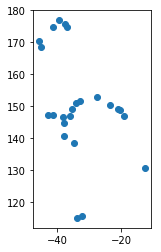

In [74]:
# To create a geodataframe of the centroids
clusters_centroids = [MultiPoint(ea).centroid for ea in clusters]
crs = {'init': 'epsg:4326'}
cgdf = gpd.GeoDataFrame(clusters, crs=crs, geometry=clusters_centroids)
# Eliminate some empty row(s)
good_cdgf = cgdf[ ~cgdf['geometry'].is_empty ]

# plot to see the centroids
good_cdgf.plot()

In [79]:
# cgdf[0]
# good_cdgf['geometry']
good_cdgf
# good_cdgf['lat'] = do a string clean
# good_cdgf['long'] = do a string clean


,0,geometry
0,"[[-42.8889077, 147.3188574], [-42.8837151, 147...",POINT (-42.88228761428572 147.3256891071429)
1,"[[-41.4347791, 147.134132]]",POINT (-41.4347791 147.134132)
2,"[[-31.9481772, 115.8626258], [-32.2871705, 115...",POINT (-32.19459091666667 115.7948312727132)
3,"[[-33.9535087, 115.0681362], [-33.6161956, 115...",POINT (-33.841071 115.0810551666667)
4,"[[-37.7743469, 144.9607404], [-37.85801, 144.9...",POINT (-38.03450432857142 144.6139719652007)
5,"[[-38.195023250000006, 146.53621493340262]]",POINT (-38.19502325000001 146.5362149334026)
6,"[[-27.4570324, 153.035097], [-27.45341, 153.03...",POINT (-27.45107148333334 153.0458535332717)
7,"[[-23.3790233, 150.5119654]]",POINT (-23.3790233 150.5119654)
8,"[[-20.2802971, 148.7286542]]",POINT (-20.2802971 148.7286542)
9,"[[-19.2615074, 146.8154877]]",POINT (-19.2615074 146.8154877)


In [ ]:
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
